# Respuestas al desafio


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSZsnBn9KHrkXmjvh851Hqkl0eKXGwLIYYlxAMRBfLQ8H_x1qiNN9tBI5AhfkoGQEvOwwiVgKS_nu--/pub?output=csv"
data = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
data.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


### P1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tú conclusión sobre esto?

In [17]:
total_desti = len(data.SIGLADES.unique())
nac_desti = len(data[data.TIPOVUELO=='N'].SIGLADES.unique()) / total_desti
inter_desti = len(data[data.TIPOVUELO=='I'].SIGLADES.unique()) / total_desti

print(f'Total destinos únicos 2017 = {total_desti}')
print(f'% destinos Nacionales = {round(nac_desti,2)}')
print(f'% destinos Internacionales = {round(inter_desti,2)}')

Total destinos únicos 2017 = 62
% destinos Nacionales = 0.26
% destinos Internacionales = 0.74


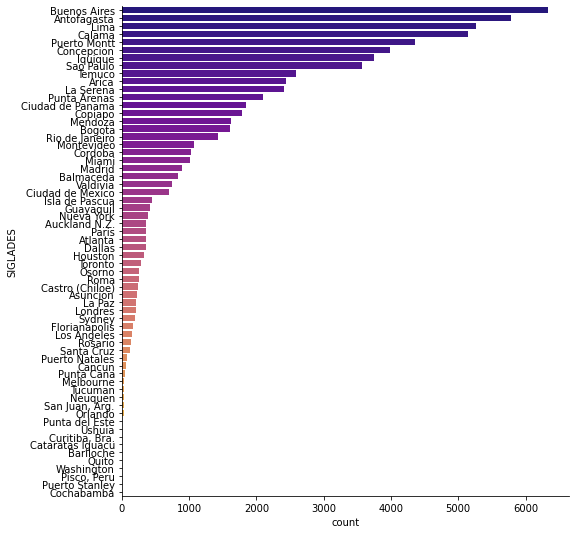

In [35]:
# DISTRIBUCION DESTINOS
sns.catplot(
    data=data,
    y='SIGLADES',
    kind='count',
    order = data.SIGLADES.value_counts().index,
    palette="plasma"

)
plt.gcf().set_size_inches(10, 8)


In [38]:
# FRECUENCIA RELATIVA DE LOS DESTINOS
data.SIGLADES.value_counts() / len(data) * 100

Buenos Aires      9.288039
Antofagasta       8.483125
Lima              7.726593
Calama            7.544791
Puerto Montt      6.388001
                    ...   
Quito             0.002932
Washington        0.001466
Pisco, Peru       0.001466
Puerto Stanley    0.001466
Cochabamba        0.001466
Name: SIGLADES, Length: 62, dtype: float64

In [24]:
# PORCENTAJE TIPOS DE VUELOS
temp = data.TIPOVUELO.value_counts(normalize=True)
temp = temp.reset_index(name='prop')
temp.rename(columns={'index':'tipo'}, inplace=True)

v_nac, v_inter = round(temp.prop[0],2), round(temp.prop[1],2)
print(f'% Vuelos Nacionales = {v_nac}')
print(f'% Vuelos Internacionales = {v_inter}')

% Vuelos Nacionales = 0.54
% Vuelos Internacionales = 0.46


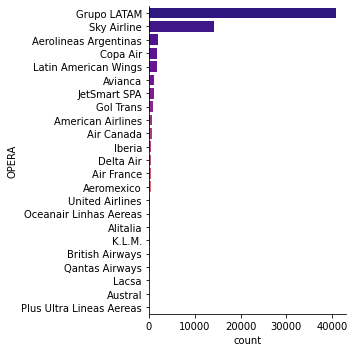

In [29]:
# DISTRIBUCION OPERACIONES POR LINEAS AEREAS 
sns.catplot(y="OPERA",
           # hue="class",
            kind="count",
            palette="plasma",
           # edgecolor=".6",
            order = data.OPERA.value_counts().index,
            data=data)

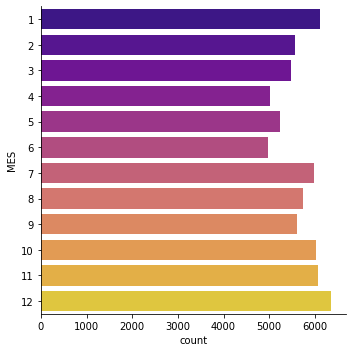

In [11]:
# DISTRIBUCION VUELOS POR MES
sns.catplot(
    data=data,
    y='MES',
    kind='count',
    palette='plasma'
)

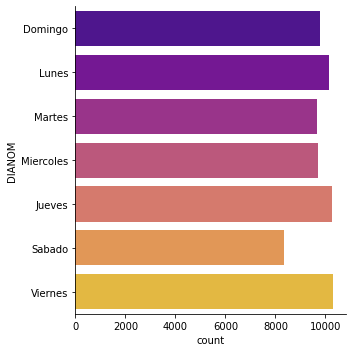

In [12]:
# DISTRIBUCION VUELOS POR DIA
sns.catplot(
    data=data,
    y='DIANOM',
    kind='count',
    palette='plasma')

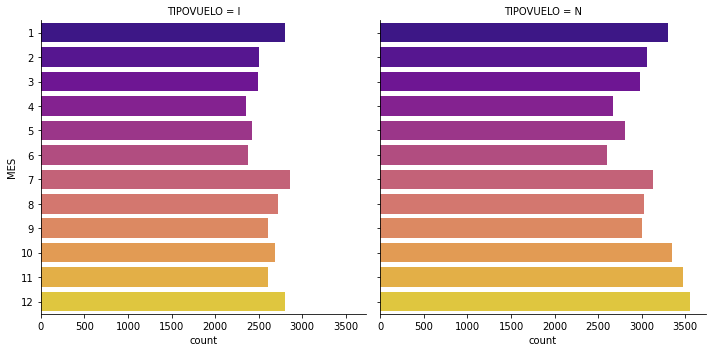

In [13]:
# COMPARACION DISTRIBUCION TIPO DE VUELO POR MES
sns.catplot(
    data=data,
    y='MES',
    kind='count',
    palette='plasma',
    col="TIPOVUELO"
)

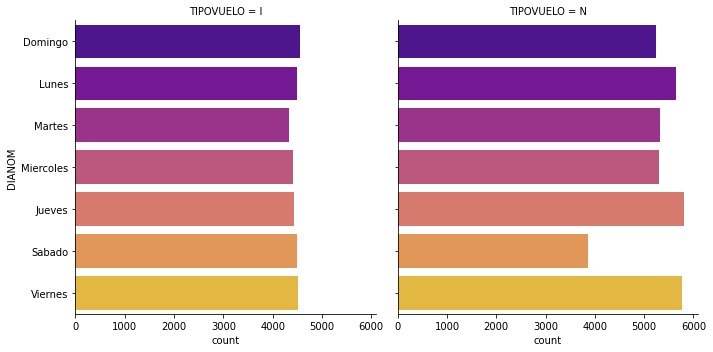

In [34]:
# COMPARACION DISTRIBUCION TIPO DE VUELO POR DIA
sns.catplot(
    data=data,
    y='DIANOM',
    kind='count',
    palette='plasma',
    col="TIPOVUELO"
)

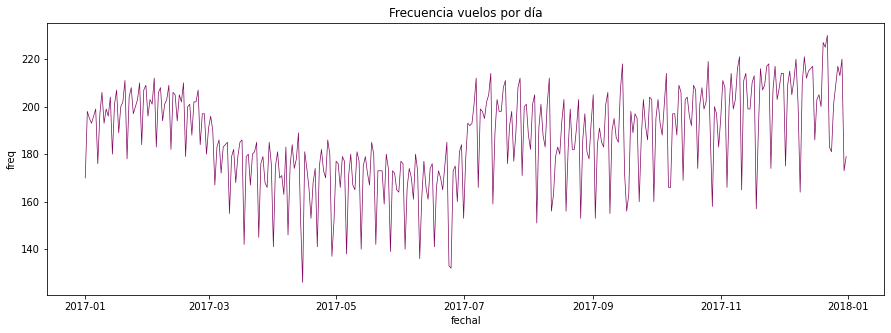

In [32]:
# DISTRIBUCION DE LOS VUELOS POR FECHA, AGRUPADO POR DIA
data['FechaPRO'] = pd.to_datetime(data['Fecha-I'])
data['FechaPRO'] = data.FechaPRO.dt.date
fechaspro = data.FechaPRO.value_counts().reset_index(name='freq')
fechaspro.rename(columns={'index':'fechaI'},inplace=True)
fechaspro.sort_values(by='fechaI',inplace=True)
sns.lineplot(x = 'fechaI', 
             y = 'freq',
             data = fechaspro, 
             color='#820661',
             linewidth=.7).set(title='Frecuencia vuelos por día')
plt.gcf().set_size_inches(15, 5)


###__Conclusiones Pregunta 1__:

Se realizo una exploracion de las principales variables que ayudan a describir el comportamiento de los vuelos en el aeropuerto con los datos entregados.

- En total se cuenta con 68.206 registros que corresponden a cada una de las operaciones desde el aeropuerto de Santiago de Chile en el año 2017.
- Los destinos únicos son 62, de los cuales el 26% corresponden a destinos nacionales, y el 74% restante son internacionales.
- Entre todos los destinos, el más frecuente es Buenos Aires con una 9.2% de los vuelos, le sigue Antofagasta con un 8.5%, Lima con un 7.8%, Calama con un 7.5% y Puerto Montt con 6.4%.
- Los vuelos nacionales corresponden al 54% de todas las operaciones, mientras que los vuelos internacionales son el 46%.
- Las lineas aéreas mas frecuentes son: 
-- Grupo LATAM
-- SKY Airlines
-- Aerolineas Argentinas
-- Copa Air
-- Latin America Wings
- Los Meses con mayor frecuencias de vuelos son: Enero, Julio y Diciembre.
- Los días con mayor frecuencia son: Lunes, Jueves y Viernes.
- Al ver la distribución de la frecuencia de los vuelos por día, se puede notar que al menos hay 4 secciones: 
desde enero a marzo, de marzo a julio, de julio a agosto y octubre a diciembre

##### __Sintesís__

El aeropuerto de Santiago de Chile tiene una cantidad mayor de destinos internacionales, sin embargo la frecuencia de estos vuelos en más baja que los nacionales. 

Al ver la alta frecuencia de vuelos nacionales, a ciudades como Antofagasta y Calama, y que los días con mayor frecuencia son los lunes, jueves y viernes, es posible deducir que en su gran mayoria estan relacionados a viajes de trabajo.

También es posible notar una erlación entre los meses con mayor frecuencia de vuelos, que son de temporadas de vacaciones, como diciembre, enero y julio.